# Financial Derivative

## Data Description

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [5]:
initial_data = yf.download("PYPL ^VIX", start="2020-10-01", end="2021-10-01")


[*********************100%***********************]  2 of 2 completed


In [6]:
initial_data.head()

Adj Close                  Close                   High  \
                  PYPL       ^VIX        PYPL       ^VIX        PYPL   
Date                                                                   
2020-09-30  197.029999  26.370001  197.029999  26.370001  198.720001   
2020-10-01  196.940002  26.700001  196.940002  26.700001  201.270004   
2020-10-02  191.910004  27.629999  191.910004  27.629999  196.210007   
2020-10-05  196.850006  27.959999  196.850006  27.959999  196.910004   
2020-10-06  191.660004  29.480000  191.660004  29.480000  197.369995   

                              Low                   Open              Volume  \
                 ^VIX        PYPL       ^VIX        PYPL       ^VIX     PYPL   
Date                                                                           
2020-09-30  27.120001  193.311005  25.059999  194.059998  26.690001  7939600   
2020-10-01  27.110001  196.220993  25.330000  199.259995  25.780001  7268900   
2020-10-02  29.900000  189.250000  26.930000  192.729996  28.870001  6546400   
2020-10-05  29.690001  192.160004  27.270000  193.550003  29.520000  5024100   
2020-10-06  30.000000  190.880005  26.010000  196.130005  28.049999  5921800   

                 
           ^VIX  
Date             
2020-09-30    0  
2020-10-01    0  
2020-10-02    0  
2020-10-05    0  
2020-10-06    0

In [7]:
initial_data['Adj Close'].head()

,PYPL,^VIX
Date,,
2020-09-30,197.029999,26.370001
2020-10-01,196.940002,26.700001
2020-10-02,191.910004,27.629999
2020-10-05,196.850006,27.959999
2020-10-06,191.660004,29.480000


In [8]:
data =  initial_data['Adj Close']
pypl = data['PYPL']
vix = data['^VIX']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-09-30 to 2021-09-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PYPL    253 non-null    float64
 1   ^VIX    253 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [10]:
data.describe()

,PYPL,^VIX
count,253.000000,253.000000
mean,251.618439,21.288577
std,32.494924,4.623441
min,179.809998,15.070000
25%,234.270004,17.690001
50%,255.600006,20.790001
75%,276.339996,23.250000
max,308.529999,40.279999


In [105]:
data.head()

,PYPL,^VIX
Date,,
2020-09-30,197.029999,26.370001
2020-10-01,196.940002,26.700001
2020-10-02,191.910004,27.629999
2020-10-05,196.850006,27.959999
2020-10-06,191.660004,29.480000


In [106]:
data.tail()

,PYPL,^VIX
Date,,
2021-09-24,278.109985,17.750000
2021-09-27,273.390015,18.760000
2021-09-28,262.190002,23.250000
2021-09-29,259.000000,22.559999
2021-09-30,260.209991,23.139999


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

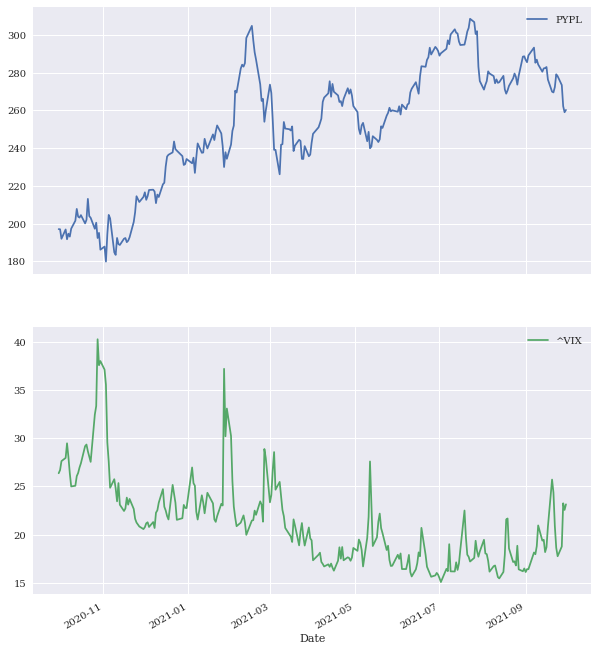

In [44]:
data.plot(figsize=(10, 12), subplots=True)

In [108]:
sym = 'PYPL'
PYPL_data = pd.DataFrame(data[sym]).dropna()
PYPL_data.tail()

,PYPL
Date,
2021-09-24,278.109985
2021-09-27,273.390015
2021-09-28,262.190002
2021-09-29,259.000000
2021-09-30,260.209991


In [109]:
PYPL_data['SMA1'] = data[sym].rolling(window=20).mean()
PYPL_data['SMA2'] = data[sym].rolling(window=60).mean()
PYPL_data[[sym, 'SMA1', 'SMA2']].tail()

,PYPL,SMA1,SMA2
Date,,,
2021-09-24,278.109985,281.998999,285.056000
2021-09-27,273.390015,281.752000,284.795834
2021-09-28,262.190002,280.438000,284.328334
2021-09-29,259.000000,278.955000,283.767667
2021-09-30,260.209991,277.628000,283.152334


<AxesSubplot:xlabel='Date'>

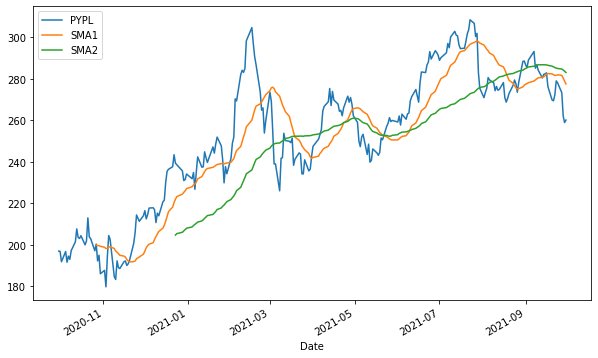

In [110]:
PYPL_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

In [111]:
log_return = np.log( pypl/ pypl.shift(1))

In [112]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 37.57 %


In [113]:
vix= vix[-1]
print('The market volatility is', round(vix,2), '%')

The market volatility is 23.14 %


In [114]:
rets = np.log(data / data.shift(1))
rets.head().round(4)

,PYPL,^VIX
Date,,
2020-09-30,NaN,NaN
2020-10-01,-0.0005,0.0124
2020-10-02,-0.0259,0.0342
2020-10-05,0.0254,0.0119
2020-10-06,-0.0267,0.0529


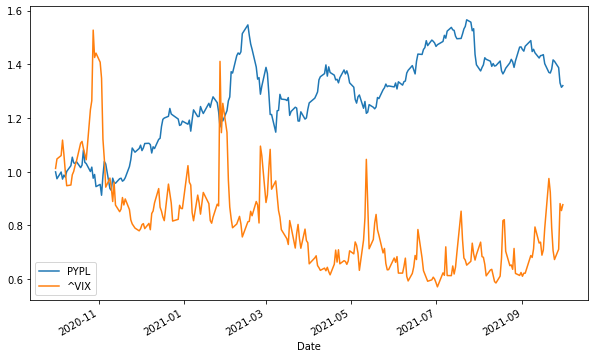

In [115]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

## Binomial Tree

In [244]:
pypl[-1]

260.2099914550781

In [245]:
S0 =pypl[-1]
K = 270              # strike
T = 1.0                 # maturity 
r = 0.0138                # risk free rate 
sig = 0.2314               # diffusion coefficient or volatility
N = 5               # number of periods or number of time steps  
payoff = "call"          # payoff 

In [246]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u       

In [247]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [248]:
S

array([[260.20999146, 288.58053289, 320.04429768, 354.93853814,
        393.63727698, 436.55531643],
       [  0.        , 234.62857655, 260.20999146, 288.58053289,
        320.04429768, 354.93853814],
       [  0.        ,   0.        , 211.56208732, 234.62857655,
        260.20999146, 288.58053289],
       [  0.        ,   0.        ,   0.        , 190.76327977,
        211.56208732, 234.62857655],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        172.00921664, 190.76327977],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 155.09887775]])

In [249]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.48748160889425385

In [250]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 166.55531643],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  84.93853814],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  18.58053289],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])

In [279]:
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))

V

array([[ 22.22211393,  36.13552664,  56.99330888,  86.42483219,
        124.38144955, 166.55531643],
       [  0.        ,   9.10821367,  16.49152243,  29.3068731 ,
         50.78847025,  84.93853814],
       [  0.        ,   0.        ,   2.13470032,   4.39114048,
          9.03270337,  18.58053289],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])

In [280]:
print('American ' + payoff, str( V[0,0]))

American call 22.22211392784775


## Monte Carlo Simulation

In [281]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [282]:
T = 1
r = 0.0138
sigma = 0.2314
S0 = pypl[-1]
K = 270

In [283]:
S = mcs_simulation_np(1000)

In [284]:
S = np.transpose(S)
S

array([[260.20999146, 258.12244416, 262.7542584 , ..., 255.1802874 ,
        252.85361925, 253.05459855],
       [260.20999146, 263.401027  , 264.31042055, ..., 251.5232518 ,
        252.57955812, 254.91661009],
       [260.20999146, 261.66513167, 262.01584929, ..., 204.48328803,
        205.95801865, 206.7480998 ],
       ...,
       [260.20999146, 262.40925993, 262.74415282, ..., 251.56064961,
        253.22091847, 254.06774007],
       [260.20999146, 260.93713128, 260.28174282, ..., 258.97618859,
        259.57947871, 262.25749244],
       [260.20999146, 261.65542127, 264.25410282, ..., 213.10930618,
        215.8399069 , 217.068227  ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

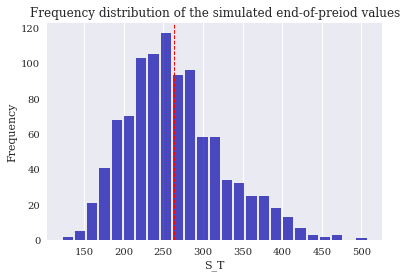

In [291]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.axvline(S.mean(), color='r', linestyle='dashed', linewidth=1)
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [292]:
round(S.mean(),2)

262.92

In [258]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('American call', str(c))

American call 21.963516423282236


# Greeks

## Delta

In [259]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [260]:
S = np.linspace(50, 500, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 270, T[i], 0.0138, 0, 0.2314, 'call')

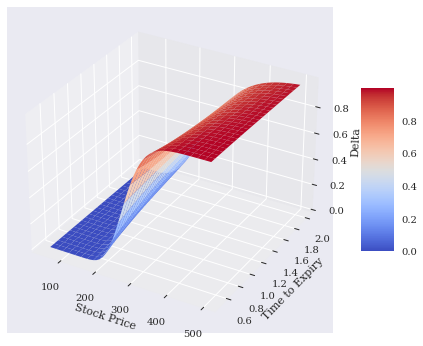

In [261]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [262]:
d = delta(pypl[-1], 270, 1, 0.0138, 0, 0.2314, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.5063 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.5063 .


## Gamma

In [263]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [264]:
gamma(pypl[-1], 270, 1, 0.0138, 0, 0.2314, 'call')

0.006624742642867516

In [265]:
S = np.linspace(150, 500, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 270, T[i], 0.01532, 0, 0.2314, 'call')

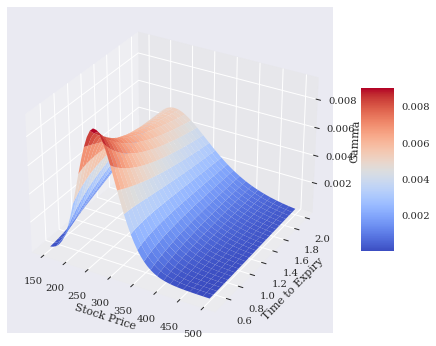

In [266]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Theta

In [267]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = - (vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T))) + q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = - (vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T))) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [268]:
theta(pypl[-1], 270, 1, 0.0138, 0, 0.2314, 'call')

-10.485477664441275

In [269]:
S = np.linspace(50, 500, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 270, T[i], 0.01532, 0, 0.2314, 'call')

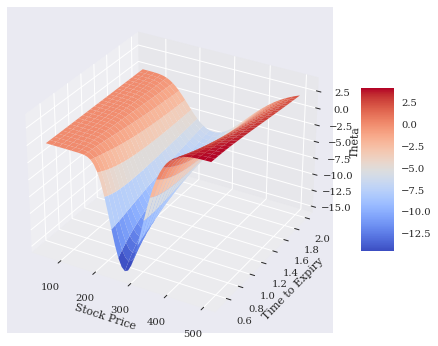

In [270]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Rho

In [190]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [271]:
rho(pypl[-1], 270, 1, 0.0138, 0, 0.2314, 'call')

110.41382919292272

In [273]:
S = np.linspace(50, 500, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 270, T[i], 0.0138, 0, 0.2314, 'call')

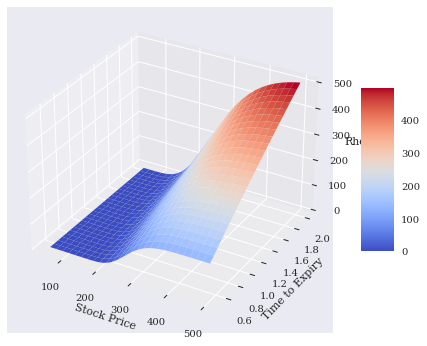

In [274]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Vega

In [315]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [316]:
vega(pypl[-1], 270, 1, 0.0138, 0, 0.2314, 'call')

103.79592486865697

In [317]:
S = np.linspace(50, 500, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 270, T[i], 0.0138, 0, 0.2314, 'call')

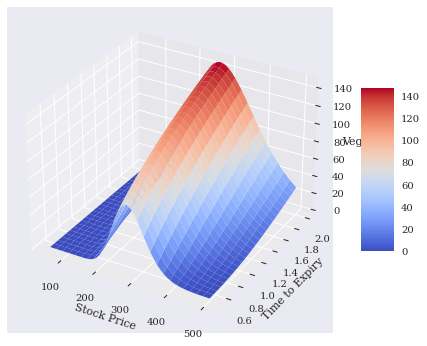

In [318]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [278]:
v = vega(pypl[-1], 270, 1, 0.0138, 0, 0.2314, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 103.7959 . If the volatility increases 1%, then the value of the option will increase $ 1.037959 .
